In [1]:
import numpy as np
import xarray as xr
import os.path as op
from dask.diagnostics import ProgressBar
from xmitgcm import open_mdsdataset
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [8]:
ys, dy = (25,5)
dt = 3e2
df = int(2*144)
ts = int(360*86400*ys/dt+df)
te = int(360*86400*(ys+dy)/dt+df)
print(ts,te)

2592288 3110688


In [9]:
ds = open_mdsdataset(op.join(ddir,'deepML-2mon_5kmLayers'), grid_dir=op.join(ddir,'5km_grid'),
                     iters=range(ts,te,df), prefix=['LAYERS-transport'],
                     delta_t=dt
                    )

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


In [6]:
ds

<xarray.Dataset>
Dimensions:              (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 1800)
Coordinates:
  * XC                   (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * YC                   (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * XG                   (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 ...
  * YG                   (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 ...
  * Z                    (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 ...
  * Zp1                  (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
  * Zu                   (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...
  * Zl                   (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
    rA                   (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG                  (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>


In [7]:
Pw = ds.LaPw1TH
Pw.attrs = ds.LaPw1TH.attrs
Ps = ds.LaPs1TH
Ps.attrs = ds.LaPs1TH.attrs
Ps

<xarray.DataArray 'LaPs1TH' (time: 1800, layer_1TH_center: 42, YG: 200, XC: 100)>
dask.array<shape=(1800, 42, 200, 100), dtype=float32, chunksize=(1, 42, 200, 100)>
Coordinates:
  * XC                (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * YG                (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 ...
    dxG               (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyC               (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    rAs               (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
  * layer_1TH_center  (layer_1TH_center) float32 -0.1 0.1 0.3 0.5 0.70000005 ...
    iter              (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time              (time) float64 8.087e+09 8.087e+09 8.087e+09 8.087e+09 ...
Attributes:
    standard_name:  LaPs1TH
    long_name:      Layer Probability at V points [-]
    units:          1
    mate:           LaPw1TH

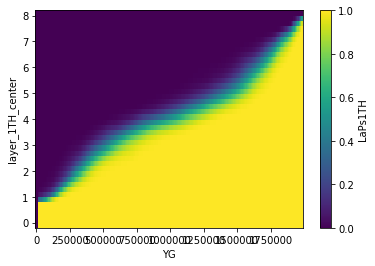

In [8]:
Ps.mean(['time','XC']).plot()